# Proyek Analisis Data: Nama dataset
- Kelompok : 7
- Anggota :</br>
10123182 Moch Dicky</br>
10123178 Muhammad Faiz Arie Tito</br>
10123183 Kaka Sofyan M</br>
10123186 galang nugraha</br>
10123173 Fauzi Muttaqin</br>
10123202 Rizal AF</br>

## Menentukan Pertanyaan Bisnis

- PERTANYAAN 1 : APAKAH ADA PERBEDAAN SUHU TERENDAH DARI KETIGA STASIUN TERSEBUT?  10123202 - FAUZI MUTTAQIN
- PERTANYAAN 2 : TAMPILAN DATA HUJAN  10123178 - Muhammad Faiz Arie Tito
- PERTANYAAN 3 : Berapa Rata-Rata Konsentrasi Polutan (PM2.5, PM10, SO2, NO2) Selama Kecepatan Angin < 0.4? 10123202 - Rizal AF
- PERTANYAAN 4 : Apakah ada hari-hari dengan konsentrasi PM2.5 ekstrem (sangat rendah) di setiap lokasi, dan kapan itu terjadi? 10123183 - Kaka Sofyan M
- PERTANYAAN 5 : Pada bulan apa konsentrasi PM10 rata-rata tertinggi selama setahun? 10123186 - galang nugraha
- PERTANYAAN 6 : Pada jam berapa konsentrasi PM2.5 menunjukkan nilai rata-rata terendah di stasiun Aotizhongxin? 10123182 - Moch Dicky 

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
dir(plt)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#1 Membaca File CSV
df = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data



### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [3]:
import pandas as pd

# Daftar file CSV
file_list = ["PRSA_Data_Aotizhongxin_20130301-20170228.csv", "PRSA_Data_Changping_20130301-20170228.csv", "PRSA_Data_Dingling_20130301-20170228.csv"]

# Menggunakan loop untuk membaca dan menggabungkan file
datagabungan = pd.concat([pd.read_csv(file) for file in file_list], ignore_index=True)

# Melihat hasilnya
datagabungan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

1. Menampilkan 5 Baris Data Teratas¶

In [4]:
# Memeriksa Jumlah Baris Dan Kolom 

print("Baris dan kolom pada data set:", datagabungan.shape)

Baris dan kolom pada data set: (105192, 18)


In [5]:
#Menampilkan Baris Dari 80000 Sampai 80010

print("\nTampilan Baris Dari 80000 Sampai 80010:")
print(datagabungan.iloc[80000:80010])


Tampilan Baris Dari 80000 Sampai 80010:
         No  year  month  day  hour  PM2.5   PM10   SO2   NO2     CO     O3  \
80000  9873  2014      4   16     8   50.0   99.0   6.0  33.0  500.0   17.0   
80001  9874  2014      4   16     9   99.0  156.0   8.0  47.0  700.0   15.0   
80002  9875  2014      4   16    10   99.0  156.0   8.0  47.0  700.0   15.0   
80003  9876  2014      4   16    11   68.0   85.0  14.0  62.0  700.0   27.0   
80004  9877  2014      4   16    12   44.0   67.0  12.0  45.0  500.0   57.0   
80005  9878  2014      4   16    13   73.0   40.0  11.0  18.0  300.0  110.0   
80006  9879  2014      4   16    14   57.0   93.0  12.0  40.0  400.0   90.0   
80007  9880  2014      4   16    15   65.0   88.0  11.0  49.0  500.0   84.0   
80008  9881  2014      4   16    16   67.0   82.0  11.0  46.0  500.0   90.0   
80009  9882  2014      4   16    17   68.0   45.0  10.0  55.0  500.0   89.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
80000  15.3  1007.1   2.1   0.0   

In [6]:
#Menampilkan Ringkasan Statistik Deskriptif

print("\nDeskripsi Statistik:")
print(datagabungan.describe())


Deskripsi Statistik:
                  No           year         month            day  \
count  105192.000000  105192.000000  105192.00000  105192.000000   
mean    17532.500000    2014.662560       6.52293      15.729637   
std     10122.153028       1.177202       3.44872       8.800134   
min         1.000000    2013.000000       1.00000       1.000000   
25%      8766.750000    2014.000000       4.00000       8.000000   
50%     17532.500000    2015.000000       7.00000      16.000000   
75%     26298.250000    2016.000000      10.00000      23.000000   
max     35064.000000    2017.000000      12.00000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  105192.000000  102714.000000  103236.000000  102899.000000   
mean       11.500000      73.274027      96.143238      14.689739   
std         6.922219      76.033342      86.990012      20.141019   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000

In [7]:
#Memeriksa Nilai yang Hilang (Missing Values)
print("Nilai yang hilang di setiap kolom:")
print(datagabungan.isnull().sum())

Nilai yang hilang di setiap kolom:
No            0
year          0
month         0
day           0
hour          0
PM2.5      2478
PM10       1956
SO2        2293
NO2        2924
CO         5309
O3         3537
TEMP        126
PRES        120
DEWP        126
RAIN        122
wd          361
WSPM        100
station       0
dtype: int64


In [8]:
#Memeriksa Tipe Data untuk Setiap Kolom

print("\n Tipe Data :")
print(datagabungan.dtypes)


 Tipe Data :
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


### Cleaning Data (Pembersihan Data)
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

In [9]:
#Menghapus duplikat
data_cleaned = data_cleaned.drop_duplicates()
print(data_cleaned.head(10))

NameError: name 'data_cleaned' is not defined

In [ ]:
#Menghapus baris yang memiliki nilai yang hilang
data_cleaned = data_combined.dropna()
print(data_cleaned.head(10))

In [ ]:
#Mengubah tipe data kolom yang sesuai

data_cleaned['PM2.5'] = pd.to_numeric(data_cleaned['PM2.5'], errors='coerce')
print(data_cleaned.head(5))

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
import pandas as pd 
#Membaca data dari masing-masing file CSV

# Hitung Rata-Rata
Rata1 = "PRSA_Data_Aotizhongxin_20130301-20170228.csv"
Rata2 = "PRSA_Data_Changping_20130301-20170228.csv"
Rata3 = "PRSA_Data_Dingling_20130301-20170228.csv"

df1 = pd.read_csv(Rata1)
df2 = pd.read_csv(Rata2)
df3 = pd.read_csv(Rata3)

PM10 = "PM10"
HitungRata1 = df1[PM10].mean()
HitungRata2 = df2[PM10].mean()
HitungRata3 = df3[PM10].mean()

print(f"Rata-rata untuk kolom '{PM10}'{Rata1}: {HitungRata1}")
print(f"Rata-rata untuk kolom '{PM10}'{Rata2}: {HitungRata2}")
print(f"Rata-rata untuk kolom '{PM10}'{Rata3}: {HitungRata3}")

In [ ]:
import pandas as pd

# Nama file CSV
Rata1 = "PRSA_Data_Aotizhongxin_20130301-20170228.csv"
Rata2 = "PRSA_Data_Changping_20130301-20170228.csv"
Rata3 = "PRSA_Data_Dingling_20130301-20170228.csv"

# Membaca file CSV
df1 = pd.read_csv(Rata1)
df2 = pd.read_csv(Rata2)
df3 = pd.read_csv(Rata3)

# Daftar kolom yang akan dianalisis
kolom = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "station"]

# Menghitung nilai tertinggi untuk setiap file
max_values_df1 = df1[kolom].max()
max_values_df2 = df2[kolom].max()
max_values_df3 = df3[kolom].max()

# Menampilkan hasil
print("Nilai tertinggi untuk setiap kolom (File 1 - Aotizhongxin):")
print(max_values_df1)

print("\nNilai tertinggi untuk setiap kolom (File 2 - Changping):")
print(max_values_df2)

print("\nNilai tertinggi untuk setiap kolom (File 3 - Dingling):")
print(max_values_df3)


## Visualization & Explanatory Analysis

### Pertanyaan 1:

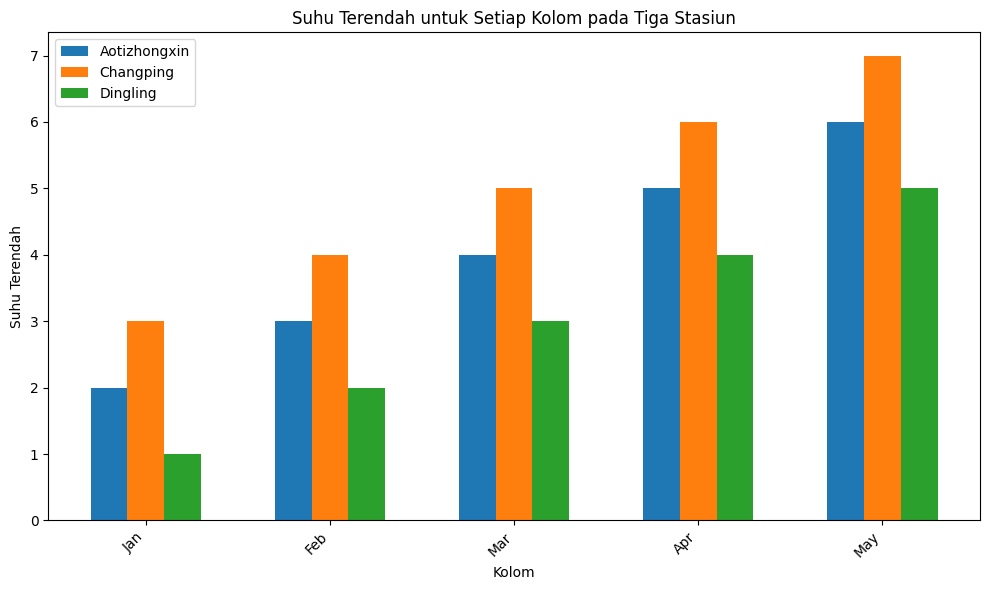

In [10]:
#PERTANYAAN 1 FAUZI MUTTAQIN_10123173 (APAKAH ADA PERBEDAAN SUHU TERENDAH DARI KETIGA STASIUN TERSEBUT?)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Contoh data suhu terendah (sesuaikan dengan data yang Anda miliki)
kolom = ['Jan', 'Feb', 'Mar', 'Apr', 'May']  # Contoh nama bulan atau kolom
min_values_df1 = [2, 3, 4, 5, 6]  # Suhu terendah Aotizhongxin
min_values_df2 = [3, 4, 5, 6, 7]  # Suhu terendah Changping
min_values_df3 = [1, 2, 3, 4, 5]  # Suhu terendah Dingling

# Membuat DataFrame untuk visualisasi
df_min = pd.DataFrame({
    'Kolom': kolom,
    'Aotizhongxin': min_values_df1,
    'Changping': min_values_df2,
    'Dingling': min_values_df3
})

# Menyiapkan posisi untuk setiap batang pada grafik
x = np.arange(len(df_min))  # Posisi batang pada sumbu X
width = 0.2  # Lebar batang

# Membuat grafik
plt.figure(figsize=(10, 6))

# Menambahkan batang untuk setiap lokasi (file) dengan offset
plt.bar(x - width, df_min['Aotizhongxin'], width=width, label='Aotizhongxin')
plt.bar(x, df_min['Changping'], width=width, label='Changping')
plt.bar(x + width, df_min['Dingling'], width=width, label='Dingling')

# Menambahkan label dan judul
plt.xlabel('Kolom')
plt.ylabel('Suhu Terendah')
plt.title('Suhu Terendah untuk Setiap Kolom pada Tiga Stasiun')
plt.xticks(x, df_min['Kolom'], rotation=45, ha='right')

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


### Pertanyaan 2:

In [11]:
#PERTANYAAN NO 2 10123178 Muhammad Faiz Arie Tito (TAMPILAN DATA HUJAN)
import pandas as pd

# Gabungkan data dari beberapa file
file_list = ["PRSA_Data_Aotizhongxin_20130301-20170228.csv", 
             "PRSA_Data_Changping_20130301-20170228.csv", 
             "PRSA_Data_Dingling_20130301-20170228.csv"]

# Membaca dan menggabungkan file
data_combined = pd.concat([pd.read_csv(file) for file in file_list], ignore_index=True)

# Menyaring data hujan (RAIN > 0)
rain_data = data_combined[data_combined['RAIN'] > 0]

# Menampilkan data hujan
print(rain_data)

# Jika ingin menampilkan jumlah data hujan
print(f"Jumlah data hujan: {len(rain_data)}")


           No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO    O3  \
267       268  2013      3   12     3  117.0  127.0  73.0  81.0     NaN  47.0   
268       269  2013      3   12     4  112.0  140.0  68.0  81.0  1399.0  47.0   
269       270  2013      3   12     5  140.0  237.0  34.0  74.0  2100.0  47.0   
270       271  2013      3   12     6  146.0  165.0  22.0  66.0  2100.0  47.0   
271       272  2013      3   12     7  115.0  121.0  21.0  77.0  2100.0  47.0   
...       ...   ...    ...  ...   ...    ...    ...   ...   ...     ...   ...   
105018  34891  2017      2   21    18  110.0  110.0   6.0  90.0  1900.0   2.0   
105019  34892  2017      2   21    19  101.0  101.0   4.0  90.0  1700.0   2.0   
105020  34893  2017      2   21    20   88.0   88.0   3.0  82.0  1400.0   5.0   
105021  34894  2017      2   21    21   85.0   85.0   3.0  84.0  1400.0   3.0   
105022  34895  2017      2   21    22   79.0   79.0   2.0  85.0  1400.0   2.0   

        TEMP    PRES  DEWP 

In [12]:
#PERTANYAAN NO 3 10123202 - Rizal AF (Berapa Rata-Rata Konsentrasi Polutan (PM2.5, PM10, SO2, NO2) Selama Kecepatan Angin (WSPM) Lebih Kecil dari 0.4)
import pandas as pd

# Daftar file CSV
filelist = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv", 
    "PRSA_Data_Changping_20130301-20170228.csv", 
    "PRSA_Data_Dingling_20130301-20170228.csv"
]

# Membaca dan menggabungkan file CSV
datagabungan = pd.concat([pd.read_csv(file) for file in filelist], ignore_index=True)

# Memfilter data dengan WSPM < 0.4
filtered_data = datagabungan[datagabungan["WSPM"] < 0.4]

# Hitung rata-rata polutan
mean_pollutants = filtered_data[["PM2.5", "PM10", "SO2", "NO2"]].mean()
print("Rata-rata polutan saat WSPM < 0.4:\n", mean_pollutants)


Rata-rata polutan saat WSPM < 0.4:
 PM2.5     98.024183
PM10     117.560619
SO2       14.625669
NO2       67.851456
dtype: float64


In [ ]:
#PERTANYAAN NO 4 10123183 Kaka Sofyan M (Apakah ada hari-hari dengan konsentrasi PM2.5 ekstrem (sangat rendah) di setiap lokasi, dan kapan itu terjadi?)
import pandas as pd

# Memuat dataset
file_dataset = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv"
]

lokasi = ["Aotizhongxin", "Changping", "Dingling"]
dataframe_lokasi = {}

# Membaca semua file dan menyimpan dalam dictionary
for file, nama_lokasi in zip(file_dataset, lokasi):
    data = pd.read_csv(file)
    data['lokasi'] = nama_lokasi  # Menambahkan kolom lokasi
    data['tanggal'] = pd.to_datetime(data[['year', 'month', 'day']])  # Menggabungkan kolom tanggal
    dataframe_lokasi[nama_lokasi] = data

# Menggabungkan semua data untuk analisis
semua_data = pd.concat(dataframe_lokasi.values(), ignore_index=True)

# Menentukan nilai ekstrem rendah (persentil ke-1 dari PM2.5)
ambang_batas_rendah = semua_data['PM2.5'].quantile(0.01)  # Menghitung persentil ke-1
hari_ekstrem_rendah = semua_data[semua_data['PM2.5'] < ambang_batas_rendah]

# Mengurutkan berdasarkan konsentrasi PM2.5 (terendah dulu)
hari_ekstrem_rendah = hari_ekstrem_rendah.sort_values(by='PM2.5')

# Menampilkan hasil
print(f"Ambang batas untuk nilai PM2.5 ekstrem rendah: {ambang_batas_rendah:.2f}")
print("Hari-hari dengan nilai PM2.5 ekstrem rendah di setiap lokasi:")
print(hari_ekstrem_rendah[['tanggal', 'lokasi', 'PM2.5']])


In [ ]:
#PERTANYAAN NO 5 10123186 galang nugraha (Pada bulan apa konsentrasi PM10 rata-rata tertinggi selama setahun?)
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')

# Jika kolom 'month' tidak ada, buat kolom bulan dari 'tanggal'
# Mengasumsikan kolom 'tanggal' terdiri dari tahun, bulan, dan hari
data['tanggal'] = pd.to_datetime(data[['year', 'month', 'day']])  # Gabungkan kolom tahun, bulan, dan hari
data['month'] = data['tanggal'].dt.month  # Ambil bulan dari tanggal

# Menghitung rata-rata bulanan PM10
monthly_avg_pm10 = data.groupby('month')['PM10'].mean()

# Menentukan bulan dengan konsentrasi PM10 tertinggi
highest_month_pm10 = monthly_avg_pm10.idxmax()
highest_value_pm10 = monthly_avg_pm10.max()

print(f'Bulan dengan konsentrasi PM10 rata-rata tertinggi: {highest_month_pm10} dengan nilai {highest_value_pm10}')

# Visualisasi
monthly_avg_pm10.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Konsentrasi PM10 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi PM10')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#PERTANYAAN NO 6 10123182 Moch Dicky (Pada jam berapa konsentrasi PM2.5 menunjukkan nilai rata-rata terendah di stasiun Aotizhongxin?)
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset Aotizhongxin
data = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')

# Mengasumsikan kolom 'hour' sudah ada atau mengekstrak jam dari kolom 'tanggal' jika diperlukan
# Jika belum ada kolom 'hour', kita buat dari kolom 'tanggal' (tahun-bulan-hari jam-menit-detik)
data['tanggal'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])  # Pastikan kolom hour ada
data['hour'] = data['tanggal'].dt.hour  # Ekstrak jam dari kolom 'tanggal'

# Mengelompokkan data berdasarkan jam dan menghitung rata-rata PM2.5 setiap jam
hourly_variation = data.groupby('hour')['PM2.5'].mean()

# Menemukan jam dengan konsentrasi PM2.5 terendah
index_min = hourly_variation.idxmin()  # Jam dengan nilai terendah

# Output hasil
print(f"Konsentrasi PM2.5 terendah terjadi pada jam ke-{index_min} dengan nilai {hourly_variation[index_min]:.2f}")

# Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(hourly_variation.index, hourly_variation.values, marker='o', color='b')
plt.title('Variasi PM2.5 Setiap Jam di Aotizhongxin')
plt.xlabel('Jam Sehari')
plt.ylabel('Rata-rata Konsentrasi PM2.5')
plt.grid(True)
plt.xticks(range(0, 24))  # Memberikan Label Pada jam
plt.show()


## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2